In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize

onehotencoder = OneHotEncoder(handle_unknown='ignore')

# copy and save categorical data, then remove them from the original
categorical = insurance[['sex','smoker','region']].copy()
insurance.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)

dummies = pd.get_dummies(categorical[:])
insurance = pd.concat([dummies, insurance], sort = 'true', axis = 1)

insurance.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges
0,1,0,0,1,0,0,0,1,19,27.900,0,16884.92400
1,0,1,1,0,0,0,1,0,18,33.770,1,1725.55230
2,0,1,1,0,0,0,1,0,28,33.000,3,4449.46200
3,0,1,1,0,0,1,0,0,33,22.705,0,21984.47061
4,0,1,1,0,0,1,0,0,32,28.880,0,3866.85520


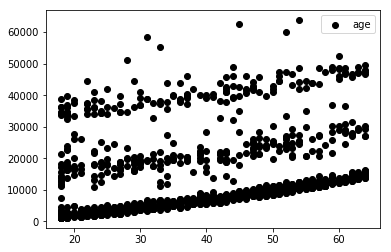

In [3]:
#plt.scatter(insurance['bmi'], insurance['charges'], label= 'bmi', color='blue')
plt.scatter(insurance['age'], insurance['charges'], label= 'age', color='black')
plt.legend()

plt.show()

### Build Linear Regression
Build the first models, check summaries and plot results

In [4]:
from sklearn.model_selection import train_test_split

x = insurance.iloc[:,:11]
y = insurance.iloc[:,11:]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [5]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=False, normalize=True, copy_X=True)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Coefficients: 
 [[   -88.72771277    -76.11243789 -11828.99274639  11664.15259574
     568.38876261    164.76540724   -348.94166513   -549.05265538
     263.75060777    311.57175505    473.04562464]]
Mean squared error: 32193193.04
Variance score: 0.79
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 25 Apr 2019   Prob (F-statistic):               0.00
Time:                        11:31:18   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobus

C:\Users\thiag\.conda\envs\Training\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


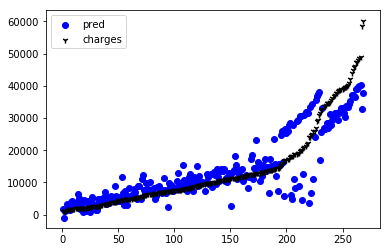

In [6]:
prediction = y_test.copy()
prediction['pred'] = y_pred
prediction = prediction.sort_values(by = 'charges')

myId = np.arange(1,prediction.shape[0]+1)
prediction['id'] = myId

# Plot outputs
#bmi_test = X_test['age'].sort_values()

plt.scatter(prediction['id'], prediction['pred'], color='blue')
plt.scatter(prediction['id'], prediction['charges'], color='black', marker='1')
plt.legend()
#plt.plot(, y_pred, color='blue', linewidth=3)

plt.show()

### Remove meaningless fields
Remove some fields that didn't have statistically significant corelation, and test Theil Sen Regression


In [7]:
x = insurance.iloc[:,:11]
y = insurance.iloc[:,11:]

x.drop(['sex_female', 'region_northeast', 'region_northwest','region_southeast','region_southwest'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [8]:
# Create linear regression object
regr = linear_model.TheilSenRegressor(copy_X=True, random_state=200)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

C:\Users\thiag\.conda\envs\Training\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coefficients: 
 [ -356.57308543 -7353.58537628  8763.09975906   257.17587888
   101.9338392    531.54347013]
Mean squared error: 57387164.86
Variance score: 0.64


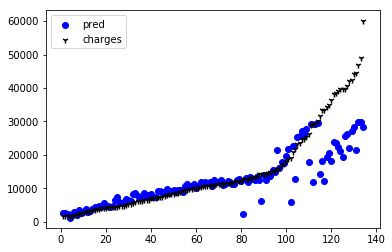

In [9]:
prediction = y_test.copy()
prediction['pred'] = y_pred
prediction = prediction.sort_values(by = 'charges')

myId = np.arange(1,prediction.shape[0]+1)
prediction['id'] = myId

# Plot outputs
#bmi_test = X_test['age'].sort_values()

plt.scatter(prediction['id'], prediction['pred'], color='blue')
plt.scatter(prediction['id'], prediction['charges'], color='black', marker='1')
plt.legend()
#plt.plot(, y_pred, color='blue', linewidth=3)

plt.show()

### Test Huber Regressor

In [10]:
# Create linear regression object
regr = linear_model.HuberRegressor(epsilon=1.1, max_iter=100, alpha=0.0001)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('r2: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 46464821.15
r2: 0.71


C:\Users\thiag\.conda\envs\Training\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


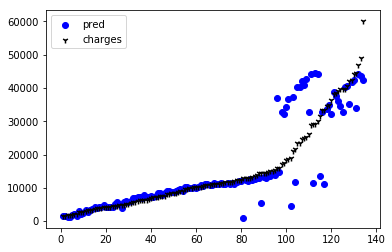

In [11]:
prediction = y_test.copy()
prediction['pred'] = y_pred
prediction = prediction.sort_values(by = 'charges')

myId = np.arange(1,prediction.shape[0]+1)
prediction['id'] = myId

# Plot outputs
#bmi_test = X_test['age'].sort_values()

plt.scatter(prediction['id'], prediction['pred'], color='blue')
plt.scatter(prediction['id'], prediction['charges'], color='black', marker='1')
plt.legend()
#plt.plot(, y_pred, color='blue', linewidth=3)

plt.show()